In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pycharge as pc
import matplotlib

In [2]:
c = 3e8 #speed of light 
lim = 5.0 #grid limit is -5 to 5 
grid_size = 1000
x0=np.linspace(-lim, lim, grid_size)
x, y, z = np.meshgrid(x0, 0, x0, indexing='ij')
v=0.9*c # velocity of the particle
tmax=9.0/v #maximum time 
print(tmax)
n_frame=50 #number of frames to make an animation 
dt=tmax/n_frame #change in time process 

charge = pc.LinearVelocityCharge(speed=v,init_pos=-0.9*lim) #sets speed and initial positions 
simulation = pc.Simulation(charge)

3.3333333333333334e-08


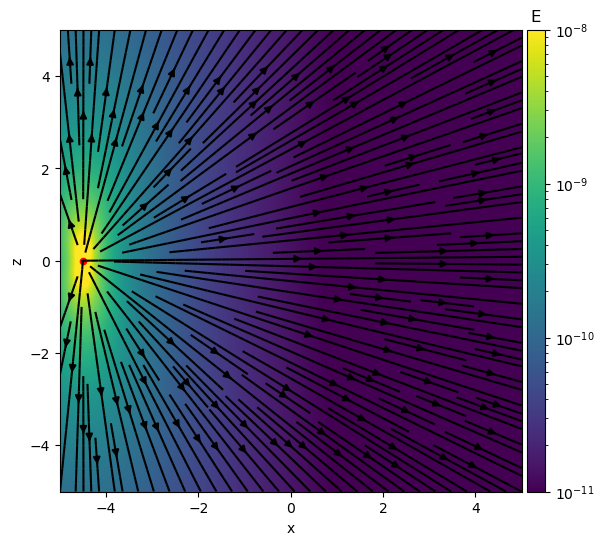

In [5]:
#plotting one frame
i=0
t=i*dt #initial time (0)
E_total = simulation.calculate_E(t=t, x=x, y=y, z=z, pcharge_field='Total') #calculates the total electric field at time t
Ex = E_total[0][:, 0, :] 
Ey = E_total[1][:, 0, :]
Ez = E_total[2][:, 0, :]
Enorm=np.sqrt(Ex**2+Ey**2+Ez**2)

fig=plt.figure(figsize=(7,6))
ax=fig.add_subplot(111)
vmin=1e-11 
vmax=1e-8
im = ax.pcolormesh(x0,x0,Enorm.T,norm=matplotlib.colors.LogNorm(vmin=vmin,vmax=vmax))
stm = plt.streamplot(x0,x0,Ex.T,Ez.T,density=2,color='k')
# step=40
# Q = ax.quiver(x0[::step], x0[::step],
#               np.transpose(Ex[::step, ::step]/Enorm[::step,::step]), np.transpose(Ez[::step, ::step]/Enorm[::step,::step]), scale_units='xy')
pos = ax.scatter(charge.xpos(t), 0, s=20, c='red', marker='o')
ax.set_aspect('equal')
plt.xlabel("x")
plt.ylabel("z")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.title('E')
plt.show()

In [6]:
import sys
import os
plotdir='./plot'
if not os.path.exists(plotdir):
    os.makedirs(plotdir)

In [7]:
for i in range(0,n_frame+1):
    t=i*dt
    E_total = simulation.calculate_E(t=t, x=x, y=y, z=z, pcharge_field='Total')
    Ex = E_total[0][:, 0, :]
    Ey = E_total[1][:, 0, :]
    Ez = E_total[2][:, 0, :]
    Enorm=np.sqrt(Ex**2+Ey**2+Ez**2)
    fig=plt.figure(figsize=(7,6))
    ax=fig.add_subplot(111)
    vmin=1e-11
    vmax=1e-8
    im = ax.pcolormesh(x0,x0,Enorm.T,norm=matplotlib.colors.LogNorm(vmin=vmin,vmax=vmax))
    stm = plt.streamplot(x0,x0,Ex.T,Ez.T,density=2,color='k')
    pos = ax.scatter(charge.xpos(t), 0, s=20, c='red', marker='o')
    ax.set_aspect('equal')
    plt.xlabel("x")
    plt.ylabel("z")
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="4%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.title('E')
    plt.savefig(os.path.join(plotdir,'slice%03d.png' % (i))) # the plots are saved as ./plot/slice000.png, ./plot/slice001.png, etc
    plt.close()

/Users/cassiemetzger/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_zeros_py.py:452: RuntimeWarning: RMS of 2.47406e-20 reached
  warnings.warn(
/Users/cassiemetzger/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_zeros_py.py:452: RuntimeWarning: RMS of 2.44774e-20 reached
  warnings.warn(
/Users/cassiemetzger/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_zeros_py.py:452: RuntimeWarning: RMS of 2.41011e-20 reached
  warnings.warn(
/Users/cassiemetzger/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_zeros_py.py:452: RuntimeWarning: RMS of 2.35252e-20 reached
  warnings.warn(
/Users/cassiemetzger/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_zeros_py.py:452: RuntimeWarning: RMS of 2.30139e-20 reached
  warnings.warn(
/Users/cassiemetzger/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_zeros_py.py:452: RuntimeWarning: RMS of 2.34062e-20 reached
  warnings.warn(
/Users/cassiemetzger/opt/anaconda3/lib/python3.9/site-packages/s

In [8]:
!ffmpeg -y -f image2 -r 6 -i plot/slice%03d.png -c:v libx264 -crf 18 -pix_fmt yuv420p const_v_0.9c.mp4
!rm plot/slice*

ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --di